Diabetes Prediction

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

Diabetes Prediction

In [19]:
#pip install scikit-learn --upgrade
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import plotly.offline as py
import plotly.io as pio
import plotly.graph_objs as go
import math
from scipy.stats import norm, skew

import warnings 
warnings.filterwarnings('ignore')



Step 1:

In [20]:
#Cargar el data set
df_raw = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')

Step 2: EDA

In [21]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


The dataset has about 35% entries with a likelihood of getting diabetes. All are varaibles numerics.

In [22]:
df_raw.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
309,2,124,68,28,205,32.9,0.875,30,1
687,1,107,50,19,0,28.3,0.181,29,0
624,2,108,64,0,0,30.8,0.158,21,0
45,0,180,66,39,0,42.0,1.893,25,1
188,8,109,76,39,114,27.9,0.640,31,1
697,0,99,0,0,0,25.0,0.253,22,0
574,1,143,86,30,330,30.1,0.892,23,0
652,5,123,74,40,77,34.1,0.269,28,0
41,7,133,84,0,0,40.2,0.696,37,0
342,1,0,68,35,0,32.0,0.389,22,0


In [23]:
df_raw.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


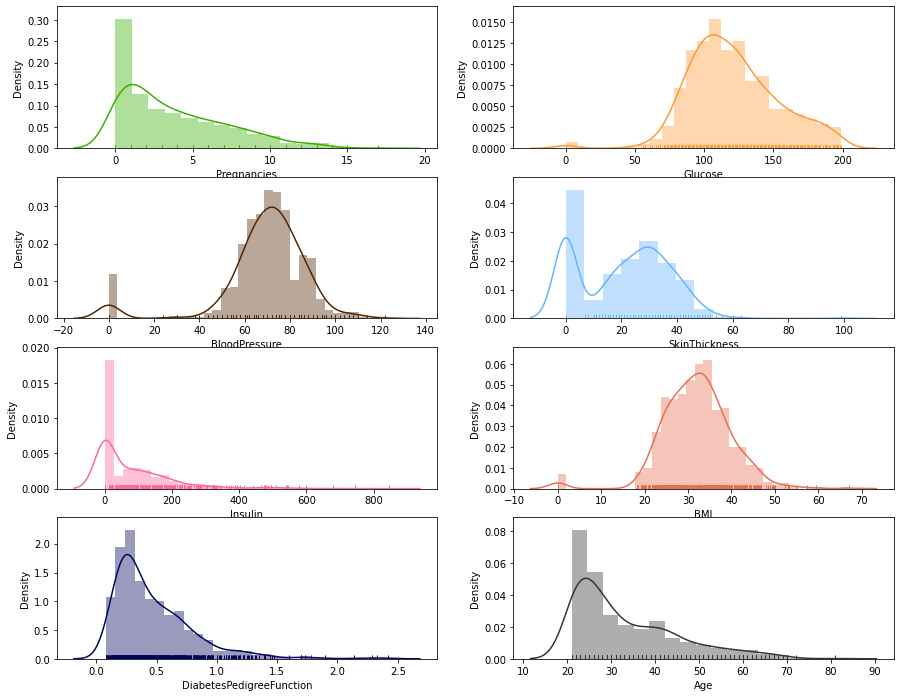

In [24]:
fig, axs = plt.subplots(4, 2, figsize=(15,12))
axs = axs.flatten()
sns.distplot(df_raw['Pregnancies'],rug=True,color='#38b000',ax=axs[0])
sns.distplot(df_raw['Glucose'],rug=True,color='#FF9933',ax=axs[1])
sns.distplot(df_raw['BloodPressure'],rug=True,color='#522500',ax=axs[2])
sns.distplot(df_raw['SkinThickness'],rug=True,color='#66b3ff',ax=axs[3])
sns.distplot(df_raw['Insulin'],rug=True,color='#FF6699',ax=axs[4])
sns.distplot(df_raw['BMI'],color='#e76f51',rug=True,ax=axs[5])
sns.distplot(df_raw['DiabetesPedigreeFunction'],color='#03045e',rug=True,ax=axs[6])
sns.distplot(df_raw['Age'],rug=True,color='#333533',ax=axs[7])
plt.show()

Preprocessing the dataset:

This dataset contains zeros and some invalid values i.e., values that are logically impossible like glucose, insulin, BMI, or blood pressure value of 0. It is possible to either drop and ignore such inconsistent values while cleaning the dataset or replacing them with a more appropriate range of values. Since there are many zeros in columns ‘Skin Thickness’ and ‘Insulin levels’; deleting those would result in a much smaller dataset. Hence, for this project, let us replace 0 values with the mean so that the size of the dataset stays the same. Also, the ‘replacing by mean value’ approach works well for features ‘BMI’, ‘glucose’ or ‘Blood pressure’.

Without logical with Zero:
Glucose
Insuline
BMI
Blood Presure
Skin Thinkness

Details for the research
Outcome is fine because it is binomial 0 and 1, Outcome: Class variable (0 or 1), Class Distribution: (class value 1 is interpreted as "tested positive for diabetes")

Pregnancies: Number of times pregnant, is fine it could be an no pregnancie for that reason could be 0.

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test,  It is a problem, is not be 0, https://medlineplus.gov/spanish/ency/article/000386.htm

BloodPressure: Diastolic blood pressure (mm Hg), It si a problem When an individual is approaching death, the systolic blood pressure will typically drop below 95mm Hg.

SkinThickness: Triceps skin fold thickness (mm, It si a problema couldn be 0, https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3598819/

Insulin: 2-Hour serum insulin (mu U/ml), It is a problem

BMI: Body mass index (weight in kg/(height in m)^2), It is a problem

DiabetesPedigreeFunction:  indicates the function which scores likelihood of diabetes based on family history Ok.

Age: Age (years)


See how much data there is in Zero and based on that see if it is analyzed or not


Glucose

In [25]:
df_raw[df_raw['Glucose']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [26]:
len(df_raw[df_raw['Glucose']==0])

5

In the case of Glucose we could elminate or sustitution with the mean of the values becouse represent the 0.65% it is so smaller.

Insuline

In [27]:
len(df_raw[df_raw['Insulin']==0])

374

In this case represent 48,69% we could replace with the mean value.

BMI

In [19]:
len(df_raw[df_raw['BMI']==0])

11

Represent 14.11% del total, could sustitute by mean.

Blood Presure

In [17]:
len(df_raw[df_raw['BloodPressure']==0])

35

Represent 4.5%  could be replace for the mean

SkinThickness

In [18]:
len(df_raw[df_raw['SkinThickness']==0])

227

Represent almost 30% total, replace the mean.

Replace the Glucose, Insuline, BMI, BloodPresure, SkinThinkness for the mean.

Example for one of them, Insulin.

In [33]:
#limpieza de datos Caluclo el promedio para los que son cero 
df_0=df_raw[(df_raw['Outcome']==0) & (df_raw["Insulin"] > 0)]
insuline_mean_0=df_0['Insulin'].mean()

In [34]:
#limpieza de datos Calculo el promedio para los que no son cero
df_no0=df_raw[(df_raw['Outcome']!=0) & (df_raw["Insulin"] > 0)]
insuline_mean_no0=df_no0['Insulin'].mean()

In [35]:
def insulina(insulin_value, outcome_value, insuline_mean_0,insuline_mean_no0):
    if outcome_value==0 and insulin_value==0:
        return insuline_mean_0
    elif outcome_value==1 and insulin_value==0:
        return insuline_mean_no0
    else:
        return insulin_value

In [36]:
df_raw['Insulin'] = df_raw.apply(lambda x: insulina(x['Insulin'], x['Outcome'],insuline_mean_0,insuline_mean_no0), axis=1)

/tmp/ipykernel_2055/146697863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['Insulin'] = df_raw.apply(lambda x: insulina(x['Insulin'], x['Outcome'],insuline_mean_0,insuline_mean_no0), axis=1)


Replace for all the variables.

In [28]:
def set_value (data_value, outcome_value,mean_nodiab,mean_diab):
    if (outcome_value == 0 and data_value==0):
        return mean_nodiab
    elif (outcome_value ==1 and data_value ==0 ):
        return mean_diab
    else:
        return data_value

def set_use_mean (name_col):
#calc the mean for diabetic and not diabetic that the data is not 0
    meanNoDiab = df_raw[(df_raw[name_col]>0) & (df_raw['Outcome']==0)][name_col].mean()
    meanDiab = df_raw[(df_raw[name_col]>0) & (df_raw['Outcome']==1)][name_col].mean()

    df_raw[name_col] = df_raw.apply(lambda x: set_value(x[name_col], x['Outcome'],meanNoDiab,meanDiab), axis=1)

set_use_mean('Glucose')
set_use_mean('Insulin')
set_use_mean('BMI')
set_use_mean('BloodPressure')
set_use_mean('SkinThickness')
df_raw.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000
mean,3.845052,121.697358,72.428141,29.247042,157.003527,32.44642,0.471876,33.240885,0.348958
std,3.369578,30.462008,12.106044,8.923908,88.860914,6.87897,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.20000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.50000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,130.287879,32.05000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,33.000000,206.846154,36.60000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.10000,2.420000,81.000000,1.000000


#Analisis de correlacion 


Using a correlation matrix, we get a complete picture of the dependencies amongst the variables and their effect on the outcome. 

In [21]:
correlacion=df_raw.corr()
correlacion

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


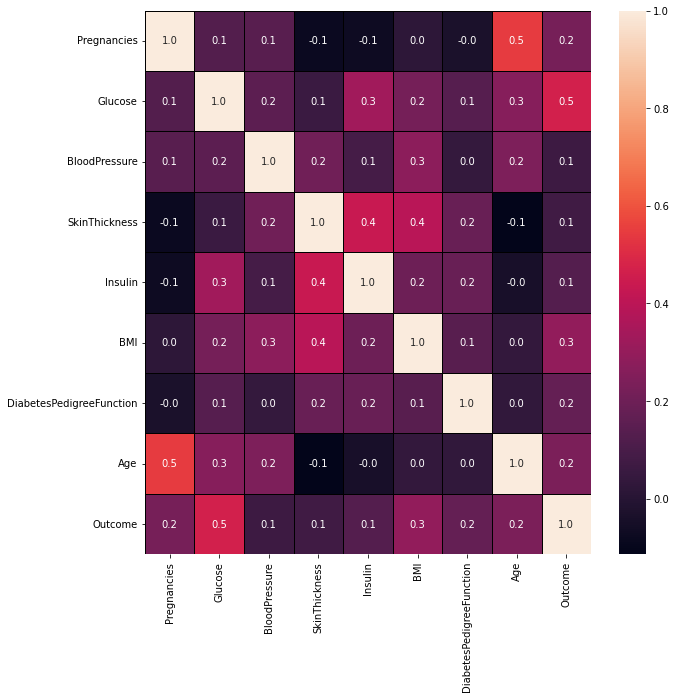

In [26]:
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(df_raw.corr(),annot=True,linewidths=0.5,linecolor="black",fmt=".1f",ax=ax)
plt.show()

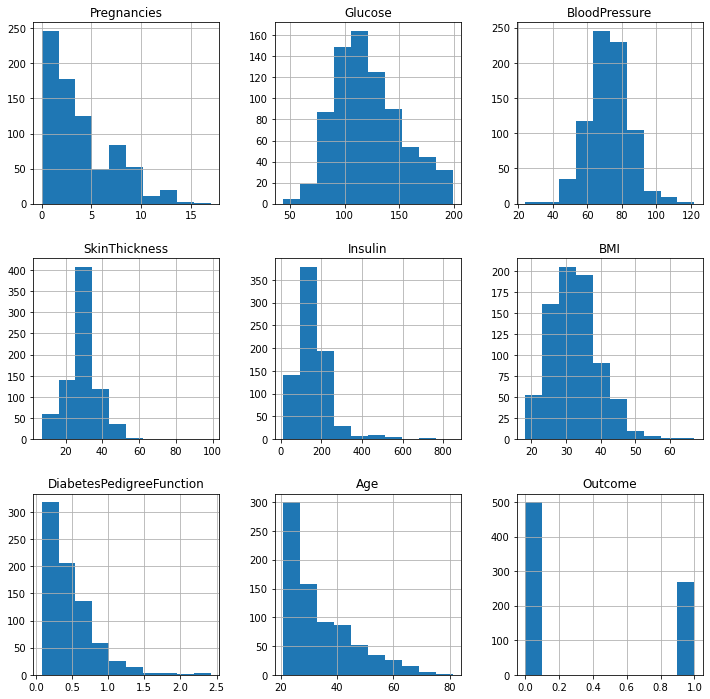

In [30]:
#Histogram post clean the dataset
df_raw.hist(figsize=(12,12))
plt.show()

In [29]:
 
#Filtrado de data set en este caso no se hace porque tiene poco datos por eso se sustituyo por mean.
#df_raw = df_raw[(df_raw["BMI"] > 0 ) & (df_raw["BloodPressure"] > 0) & (df_raw["Glucose"] > 0)]
#df_filter = df_raw.copy()
#df_filter

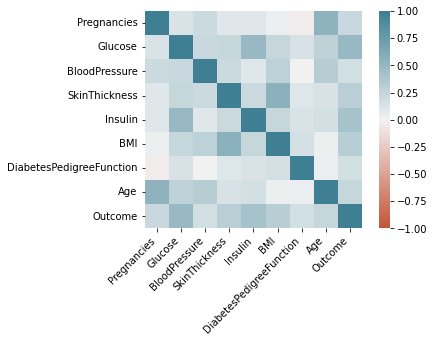

In [31]:
import seaborn as sns
corr = df_raw.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Here, we can see that the feature ‘glucose’ has a high correlation with the outcome which is expected. Other than that, none of the parameters seems to bear a very strong correlation to each other. This is why it might not be possible to drop certain features while training the model. We could analize with this varaibles Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction'

In [32]:
# feature selection
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction']
x = df_raw[feature_cols]
y = df_raw.Outcome

Step 3:

In [33]:
# split data
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state=1)

Build the classifier

In [34]:
# build model
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train, Y_train)

In [35]:
# predict
y_pred = classifier.predict(X_test)
print(y_pred)

[1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 0
 1 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0
 1 1 1 1 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1 1
 0 0 1 1 0 0 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 1 1 1 0 0
 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 1 1 1 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0
 0 1 0 1 0 0 0 1 1]


Build the tree

In [36]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)
print(confusion_matrix(Y_test, y_pred))

# accuracy
print("Accuracy:", metrics.accuracy_score(Y_test,y_pred))

[[121  25]
 [ 14  71]]
Accuracy: 0.8311688311688312


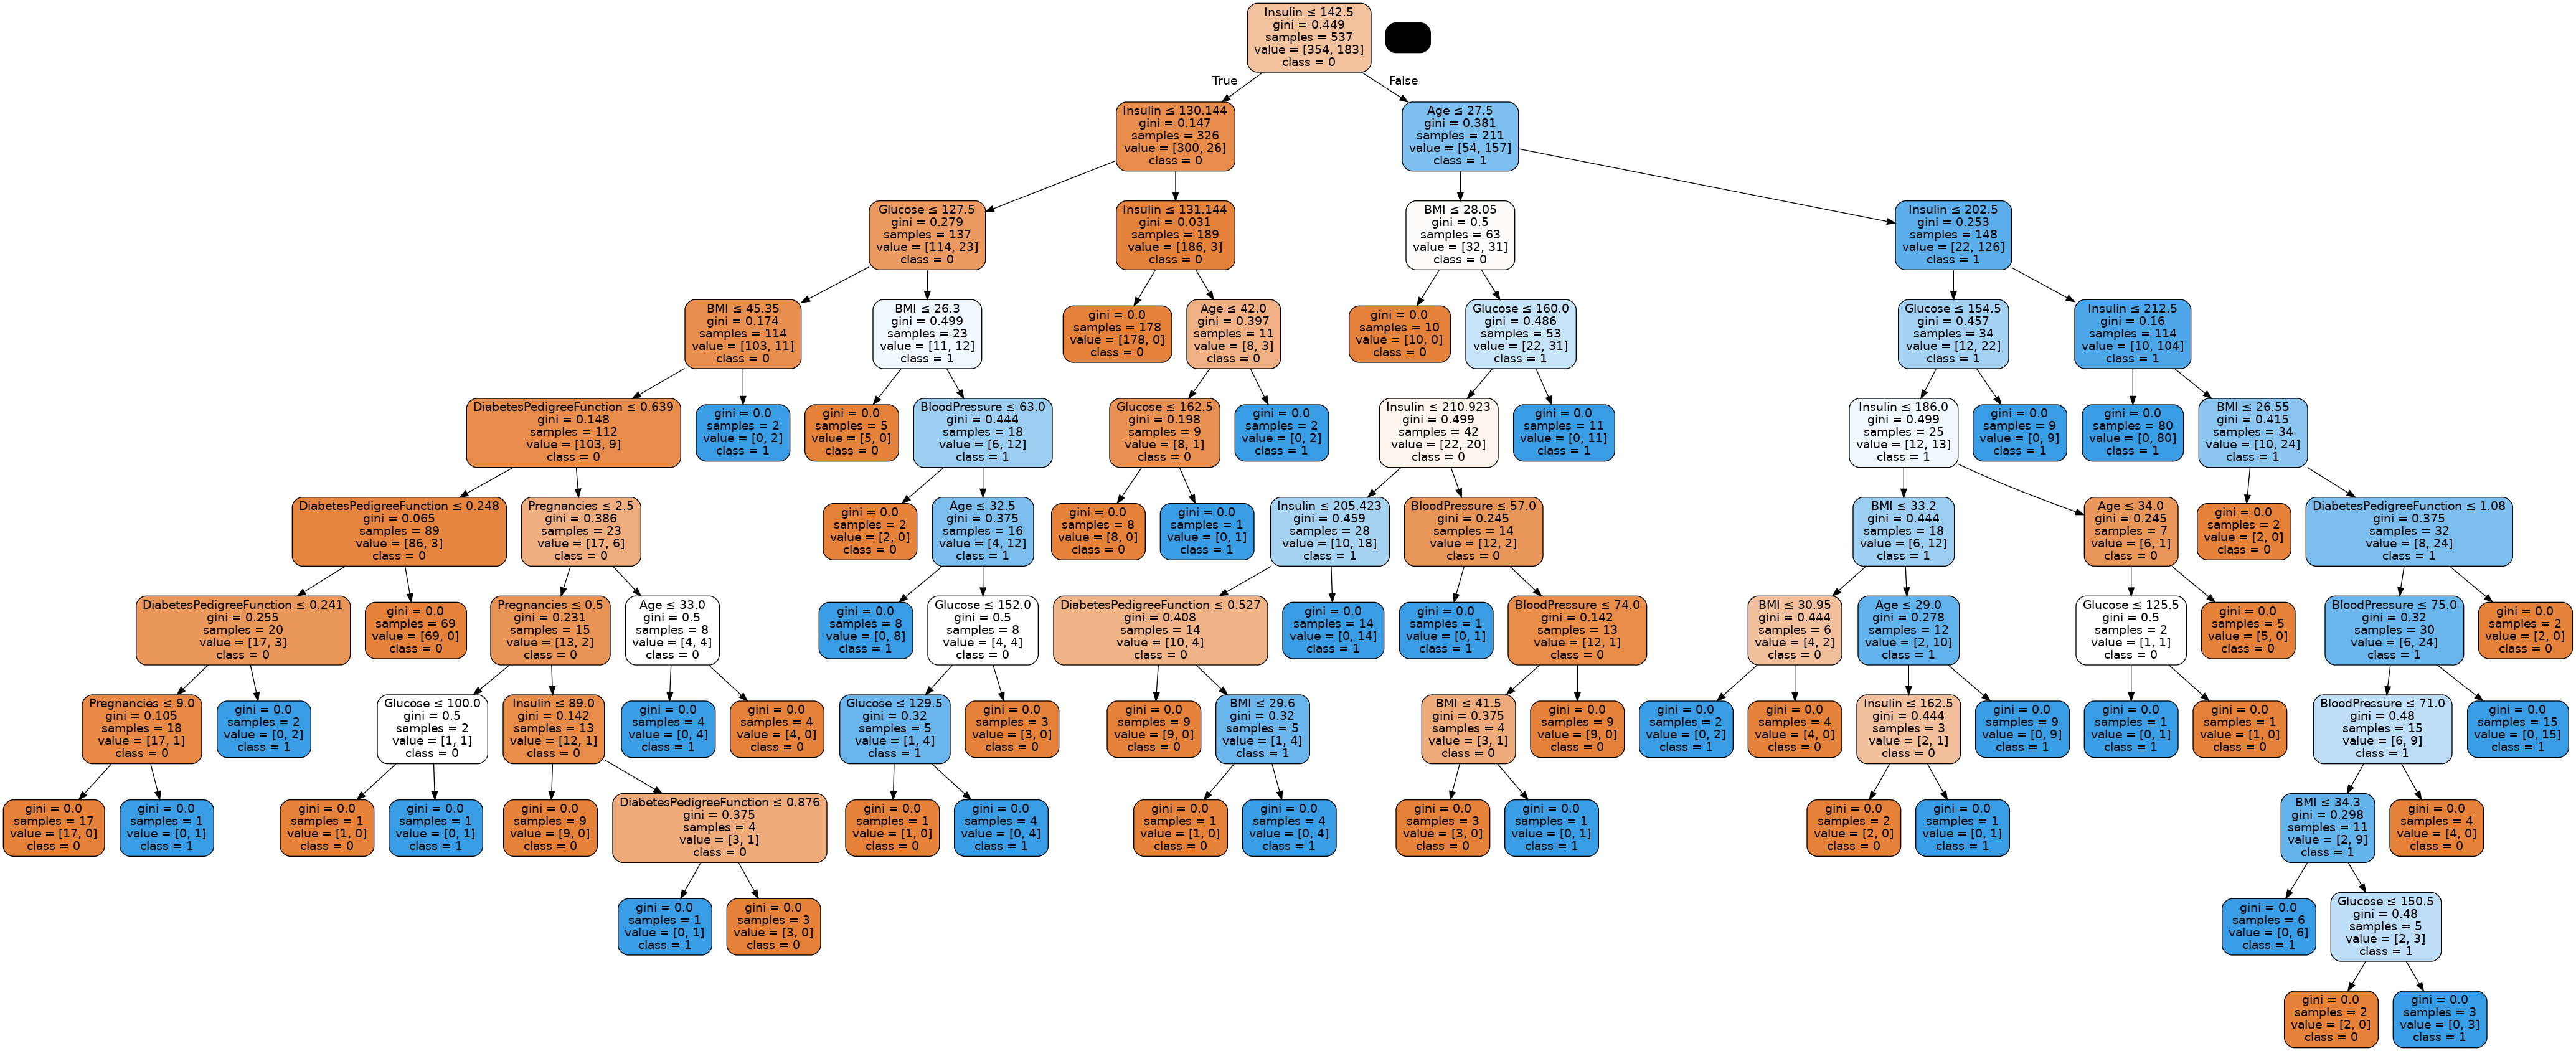

In [45]:
##sudo apt install graphviz
##pip install graphviz
#pip install six
#pip install --upgrade scikit-learn==0.20.3
#pip install pydotplus
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
import os

dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

Step 4: Change your decision tree to use 'entropy' as criterion.

Step 5:Hypertune your model using GridSearch to find the best hyperparameters.

Train your model with the optimal hyperparameters.

Again use the app.py to create your final machine learning model.

Save your final model in the 'models' folder.

In your README file write a brief summary of your cleaning and modeling process.

Machine learning methods are widely used in predicting diabetes, and they get preferable results. Decision tree is one of popular machine learning methods in medical field, which has grateful classification power. Random forest generates many decision trees. Neural network is a recently popular machine learning method, which has a better performance in many aspects. So in this study, we used decision tree, random forest (RF) and neural network to predict the diabetes.

### Referencia Diabetes Prediction With PyCaret - interesante Tabla compartaiva de modelos Clasificacion: https://www.analyticsvidhya.com/blog/2021/07/diabetes-prediction-with-pycaret/#:~:text=Diabetes%20Pedigree%20Function%3A%20indicates%20the,%3D%20yes%2C%200%20%3D%20no)                                           https://www.kaggle.com/code/aungpyaeap/diabetes-test-using-decision-tree/notebook                                                                                                                            https://www.researchgate.net/profile/Jayaram-Ma-2/publication/228983015_Application_of_Genetic_Algorithm_Optimized_Neural_Network_Connection_Weights_for_Medical_Diagnosis_of_PIMA_Indians_Diabetes/links/53fd54dd0cf22f21c2f7e3b9/Application-of-Genetic-Algorithm-Optimized-Neural-Network-Connection-Weights-for-Medical-Diagnosis-of-PIMA-Indians-Diabetes.pdf  

Pycaret https://pycaret.readthedocs.io/en/latest/api/classification.html